In [17]:
#telephone classification problem
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from scipy import stats  
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
df = pd.read_csv("Telco-Customer-Churn.csv")

print(df.info)

#print(df.isnull().sum())# no counter for null values, since there is no null values in the data set

#print(df.columns) #just checking

#print(df.dtypes)

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [3]:
encoder = LabelEncoder()
#feature engineering and feature change
df["PhoneService"] = df["PhoneService"].apply(lambda x: 1 if x == "Yes" else 0)
df["DeviceProtection"] = df["DeviceProtection"].apply(lambda x: 1 if x == "Yes" else 0)
df["TechSupport"] = df["TechSupport"].apply(lambda x: 1 if x == "Yes" else 0)
df["StreamingTV"] = df["StreamingTV"].apply(lambda x: 1 if x == "Yes" else 0)
df["StreamingMovies"] = df["StreamingMovies"].apply(lambda x: 1 if x == "Yes" else 0)
df["OnlineSecurity"] = df["OnlineSecurity"].apply(lambda x: 1 if x == "Yes" else 0)
df["OnlineBackup"] = df["OnlineBackup"].apply(lambda x: 1 if x == "Yes" else 0)
df["MultipleLines"] = df["MultipleLines"].apply(lambda x: 1 if x == "Yes" else 0)
df["Contract"] = encoder.fit_transform(df["Contract"])
df["PaperlessBilling"] = df["OnlineSecurity"].apply(lambda x: 1 if x == "Yes" else 0)
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)
df["NoChurn"] = 1 - df["Churn"]


In [4]:
#checking correlations
corr_matrix = df.corr()
corr = corr_matrix[["Churn", "PhoneService", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]]
#print(corr) 


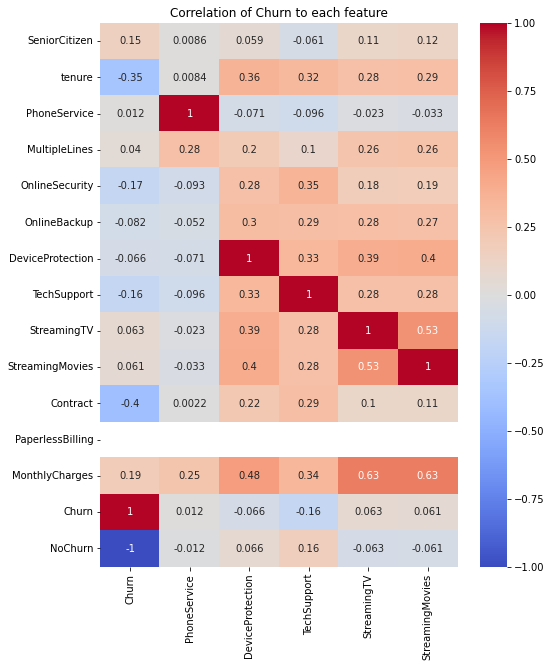

In [5]:
#getting the correlation of churn to all numeric values
plt.figure(figsize=(8, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation of Churn to each feature")
#plt.savefig("churn-correlation.png", format="png", dpi=300, bbox_inches='tight')
plt.show()

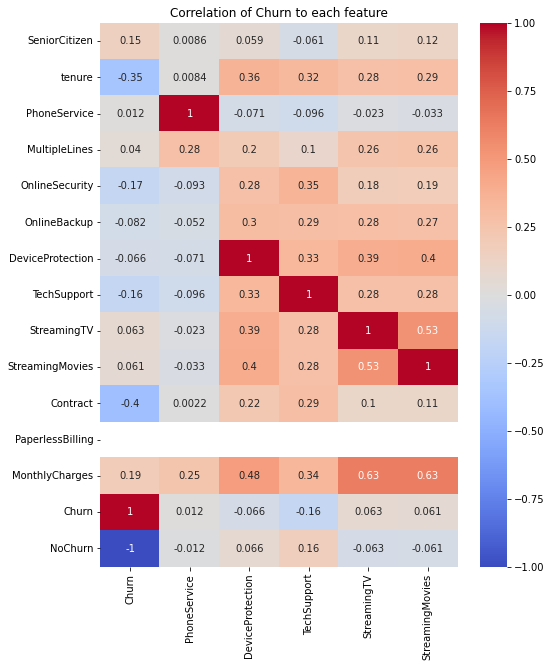

In [6]:
corr = corr_matrix[["Churn", "PhoneService", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]]
plt.figure(figsize=(8, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation of Churn to each feature")
#plt.savefig("revised-churn-correlation.png", format="png", dpi=300, bbox_inches='tight')
plt.show()

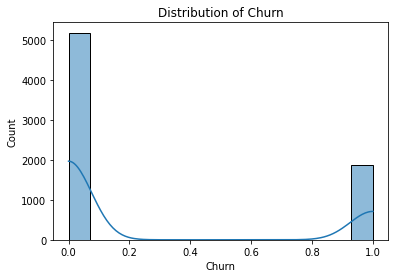

In [7]:
#would like to know if the data follows a gaussian distribution
sns.histplot(df["Churn"], kde=True)
plt.title("Distribution of Churn")
plt.show()
#plt.savefig("churn-distribution.png", format="png")


In [8]:
stat, p_value = stats.shapiro(df["Churn"])
print(f"Shapiro-Wilk Test for Gaussian Distribution:\np-value: {p_value}\nstat: {stat}") #does not follow a gaussian distribution


Shapiro-Wilk Test for Gaussian Distribution:
p-value: 0.0
stat: 0.5510977506637573


/home/creiann/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [9]:
#feature engineering
df["Average_Monthly_Charge"] = df["MonthlyCharges"].mean()
df["No_Churn"] = df["Churn"].apply(lambda x: 0 if x == 1 else 1).fillna(0)


In [16]:
#model 1
X = df[["PhoneService", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "MultipleLines", "Contract", "PaperlessBilling"]]
Y = df["Churn"]

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=0)
model = SVC()
model.fit(X_Train, Y_Train)

y_pred = model.predict(X_Test)
y_pred_train = model.predict(X_Train)
print(f"Training Set Score: {model.score(X_Train, Y_Train)}")
print(f"Test Set Score: {model.score(X_Test, Y_Test)}")
print(f"Test Set Prediction: {mean_squared_error(Y_Test, y_pred)}")
print(f"Training Set Prediction: {mean_squared_error(Y_Train, y_pred_train)}")

Training Set Score: 0.7567055853581571
Test Set Score: 0.7546099290780142
Test Set Prediction: 0.2453900709219858
Training Set Prediction: 0.24329441464184284


In [26]:
#model 2
X = df[["PhoneService", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "MultipleLines", "Contract", "PaperlessBilling"]]
Y = df[["Churn"]]

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)
model = GradientBoostingClassifier(learning_rate=0.5, n_estimators=1000, criterion="friedman_mse", random_state=0)
model.fit(X_Train, Y_Train)

y_pred = model.predict(X_Test)
y_pred_train = model.predict(X_Train)
print(f"Training Set Score: {round(model.score(X_Train, Y_Train), 2)}")
print(f"Test Set Score: {round(model.score(X_Test, Y_Test), 2)}")
print(f"Test Set Prediction: {mean_squared_error(Y_Test, y_pred)}")
print(f"Training Set Prediction: {mean_squared_error(Y_Train, y_pred_train)}")

/home/creiann/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training Set Score: 0.76
Test Set Score: 0.75
Test Set Prediction: 0.2512420156139106
Training Set Prediction: 0.24085906993255235


In [29]:
ids = df.loc[X_Test.index, "customerID"]
y_pred_labels = pd.Series(y_pred).map({1: "Yes", 0: "No"})
submission = pd.DataFrame({"customerID": ids, "Churn": y_pred_labels})
submission.to_csv("submissions.csv", index=False)